In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


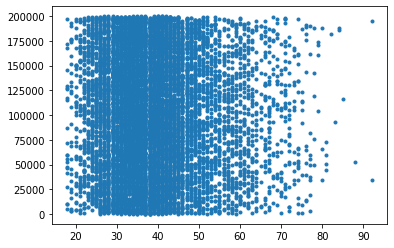

In [4]:
plt.scatter(df['Age'],df['EstimatedSalary'],marker='.')

In [5]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

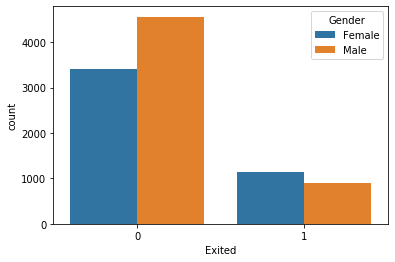

In [6]:
sns.countplot('Exited',data=df,hue='Gender')

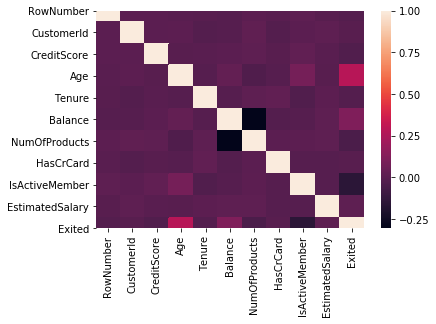

In [7]:
sns.heatmap(df.corr())

In [8]:
df.drop('RowNumber',axis=1,inplace=True)

In [9]:
df.drop('CustomerId',axis=1,inplace=True)

In [10]:
df.drop('Surname',axis=1,inplace=True)

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


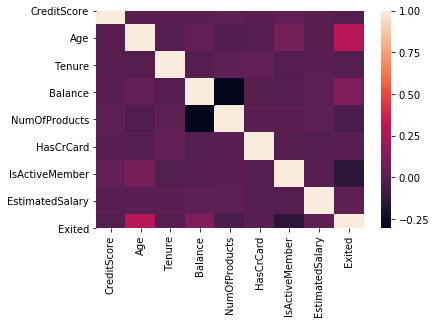

In [12]:
sns.heatmap(df.corr())

In [13]:
df['Exited'].corr(df['Age'])

0.2853230378350681

In [14]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [15]:
X=df.drop('Exited',axis=1).values

In [16]:
y=df['Exited'].values

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
label_encoder=LabelEncoder()
one_hot_encoder=OneHotEncoder()

In [19]:
X[:,1]

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [20]:
X[:,1]=label_encoder.fit_transform(X[:,1])

In [21]:
X[:,1]

array([0, 2, 0, ..., 0, 1, 0], dtype=object)

In [22]:
X[:,2]

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [23]:
X[:,2]=label_encoder.fit_transform(X[:,2])

In [24]:
X[:,2]

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [44]:
X[:,1]

array([0, 2, 0, ..., 0, 1, 0], dtype=object)

In [25]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\jinit jain\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\jinit jain\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [30]:
X[0]

array([0.0000000e+00, 0.0000000e+00, 6.1900000e+02, 0.0000000e+00,
       4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [31]:
X[1]

array([0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
       4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [35]:
model=Sequential()

In [36]:
units_1=30
units_2=15
units_3=1
model.add(Dense(units=units_1,activation='relu'))

model.add(Dense(units=units_2,activation='relu'))


model.add(Dense(units=units_3,activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [38]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
           verbose=1
          )

Epoch 1/50
8000/8000 [==============================] - 1s 174us/step - loss: 0.4943 - accuracy: 0.7744
Epoch 2/50
8000/8000 [==============================] - 0s 29us/step - loss: 0.4182 - accuracy: 0.8216
Epoch 3/50
8000/8000 [==============================] - 0s 30us/step - loss: 0.3989 - accuracy: 0.8303
Epoch 4/50
8000/8000 [==============================] - 0s 32us/step - loss: 0.3800 - accuracy: 0.8405 0s - loss: 0.3729 - accura
Epoch 5/50
8000/8000 [==============================] - 0s 28us/step - loss: 0.3625 - accuracy: 0.8519
Epoch 6/50
8000/8000 [==============================] - 0s 29us/step - loss: 0.3508 - accuracy: 0.8589
Epoch 7/50
8000/8000 [==============================] - 0s 30us/step - loss: 0.3440 - accuracy: 0.8605
Epoch 8/50
8000/8000 [==============================] - 0s 33us/step - loss: 0.3411 - accuracy: 0.8610
Epoch 9/50
8000/8000 [==============================] - 0s 32us/step - loss: 0.3381 - accuracy: 0.8612
Epoch 10/50
8000/8000 [======================

In [39]:
model.history.history

{'loss': [0.4943016049861908,
  0.41817445051670077,
  0.39885390692949296,
  0.3800171288251877,
  0.36250915777683257,
  0.3508171129822731,
  0.34395908421278,
  0.3411368997097015,
  0.3380732389986515,
  0.33595760694146154,
  0.3335637934803963,
  0.3325100877583027,
  0.33037551429867745,
  0.3292438428401947,
  0.32852673119306564,
  0.32650067311525344,
  0.32572104889154435,
  0.32385593169927596,
  0.32375375932455064,
  0.32373645627498626,
  0.3223534964323044,
  0.32158633571863177,
  0.3206483192741871,
  0.3209824476242065,
  0.3191923839449883,
  0.3192662572860718,
  0.318488204985857,
  0.3182233654558659,
  0.31586388647556307,
  0.3169513937532902,
  0.3154792680442333,
  0.3153768717944622,
  0.3130816581249237,
  0.3142707384228706,
  0.31363402074575425,
  0.3124173448681831,
  0.3123477712869644,
  0.3118718061447144,
  0.31182474991679193,
  0.31175307333469393,
  0.3106036451160908,
  0.310335698723793,
  0.3096234078705311,
  0.30888806891441345,
  0.3098094

In [40]:
model_loss = pd.DataFrame(model.history.history)

In [41]:
model_loss

,loss,accuracy
0,0.494302,0.774375
1,0.418174,0.821625
2,0.398854,0.830250
3,0.380017,0.840500
4,0.362509,0.851875
5,0.350817,0.858875
6,0.343959,0.860500
7,0.341137,0.861000
8,0.338073,0.861250
9,0.335958,0.864875


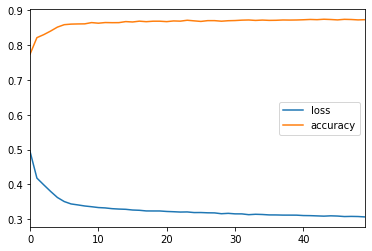

In [42]:
model_loss.plot()

In [43]:
predictions = model.predict_classes(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.51      0.59       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



In [46]:
print(confusion_matrix(y_test,predictions))

[[1499   96]
 [ 197  208]]


Lets use validation_data to train our model

In [71]:
df=pd.read_csv('Churn_Modelling.csv')

In [72]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [73]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
X=df.drop('Exited',axis=1).values

In [76]:
y=df['Exited'].values

In [77]:
X[:,1]=label_encoder.fit_transform(X[:,1])

In [78]:
X[:,2]=label_encoder.fit_transform(X[:,2])

In [55]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\jinit jain\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\jinit jain\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [80]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
units_1=30
units_2=15
units_3=1
model.add(Dense(units=units_1,activation='relu', input_dim = 11))

model.add(Dense(units=units_2,activation='relu'))
model.add(Dense(units=units_2,activation='relu'))


model.add(Dense(units=units_3,activation='sigmoid'))

In [84]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [85]:
X_train.shape

(8000, 11)

In [86]:
X_test.shape

(2000, 11)

In [87]:
y_train.shape

(8000,)

In [88]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
           verbose=1,
          validation_data=(X_test, y_test)
          )

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 116us/step - loss: 0.5120 - accuracy: 0.7960 - val_loss: 0.4371 - val_accuracy: 0.7975
Epoch 2/50
8000/8000 [==============================] - 0s 53us/step - loss: 0.3841 - accuracy: 0.8134 - val_loss: 0.3809 - val_accuracy: 0.8330
Epoch 3/50
8000/8000 [==============================] - 0s 52us/step - loss: 0.3439 - accuracy: 0.8610 - val_loss: 0.3628 - val_accuracy: 0.8470
Epoch 4/50
8000/8000 [==============================] - 0s 59us/step - loss: 0.3320 - accuracy: 0.8687 - val_loss: 0.3607 - val_accuracy: 0.8470
Epoch 5/50
8000/8000 [==============================] - 0s 58us/step - loss: 0.3212 - accuracy: 0.8720 - val_loss: 0.3737 - val_accuracy: 0.8535
Epoch 6/50
8000/8000 [==============================] - 0s 61us/step - loss: 0.3195 - accuracy: 0.8733 - val_loss: 0.3601 - val_accuracy: 0.8520
Epoch 7/50
8000/8000 [==============================] - 0s 58us/step - loss: 0.31

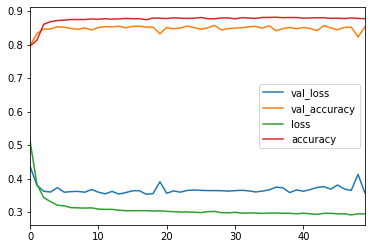

In [89]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Here we need to do early stopping bcoz of overfitting , but dataset is small so we dont do it

In [90]:
predictions = model.predict_classes(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.69      0.49      0.58       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [93]:
print(confusion_matrix(y_test,predictions))

[[1506   89]
 [ 205  200]]


In [94]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Text(33.0, 0.5, 'Actual classes')

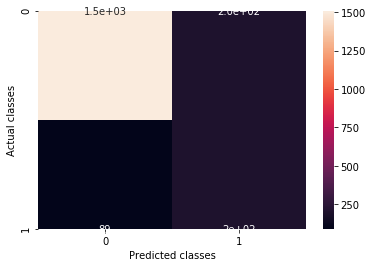

In [96]:
cfm = confusion_matrix(predictions, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')